In [1]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("tweet_emotions.csv")
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [3]:
df = df[['sentiment', 'content']]

In [4]:
def clear_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'[^ a-z]', '', text)
    while text.find('  ') != -1:
        text = text.replace('  ', ' ')
    return text
df['content']= df['content'].apply(lambda x:clear_text(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [6]:
df['content'] = df['content'].apply(lambda x: word_tokenize(x))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sentiment,content
0,empty,"[tiffanylue, i, know, i, was, listenin, to, ba..."
1,sadness,"[layin, n, bed, with, a, headache, ughhhhwaiti..."
2,sadness,"[funeral, ceremonygloomy, friday]"
3,enthusiasm,"[wants, to, hang, out, with, friends, soon]"
4,neutral,"[dannycastillo, we, want, to, trade, with, som..."


In [7]:
stop_words = stopwords.words('english')

def remove_stop_words(text):
  type(text)
  filtered_text = []
  for w in text:
    if w not in stop_words:
      filtered_text.append(w)
  return filtered_text

df['content'] = df['content'].apply(lambda x:remove_stop_words(x))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,sentiment,content
0,empty,"[tiffanylue, know, listenin, bad, habit, earli..."
1,sadness,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,sadness,"[funeral, ceremonygloomy, friday]"
3,enthusiasm,"[wants, hang, friends, soon]"
4,neutral,"[dannycastillo, want, trade, someone, houston,..."


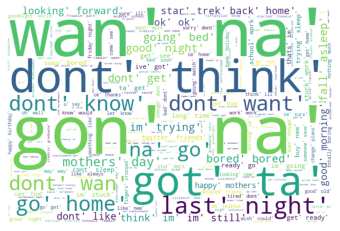

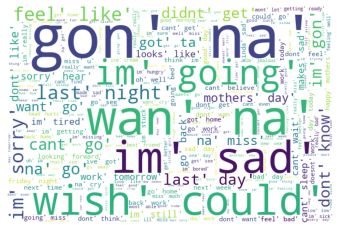

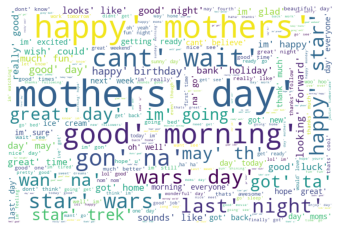

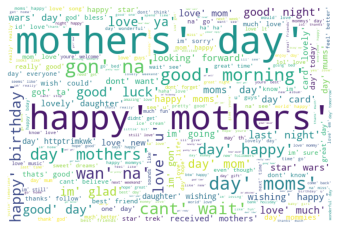

In [8]:
def visualize(label):
    text = ''
    for t in df[df['sentiment'] == label]['content']:
        t = str(t)
        t = t.lower()
        text += t + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white", collocation_threshold = 3).generate(text)
    plt.imshow(wordcloud)
    plt.axis('off') #markup
    plt.show()

visualize('empty')
visualize('sadness')
visualize('happiness')
visualize('love')

In [9]:
train, test = np.split(df, [int(.8*len(df))])


In [10]:
train.shape

(32000, 2)

In [11]:
train

,sentiment,content
0,empty,"[tiffanylue, know, listenin, bad, habit, earli..."
1,sadness,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,sadness,"[funeral, ceremonygloomy, friday]"
3,enthusiasm,"[wants, hang, friends, soon]"
4,neutral,"[dannycastillo, want, trade, someone, houston,..."
...,...,...
31995,worry,"[theraj, kind, figured, hed, probably, unable,..."
31996,relief,"[going, town, friend, long, time, havent, seen..."
31997,sadness,"[got, caught, rain, sand, monsoon, way, home, ..."
31998,relief,"[time, put, weapons, charger, night, sleep, ti..."


In [12]:
def to_string(l):
  text = ''
  for i in l:
    text += i
  return text
train['content'] = train['content'].apply(lambda x:to_string(x))

In [13]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(train['content'])
y = train['sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8,random_state=0)

In [14]:
print(X_train)

  (0, 26162)	1.0
  (1, 13824)	1.0
  (2, 17504)	1.0
  (3, 20863)	1.0
  (4, 8600)	1.0
  (5, 17998)	1.0
  (6, 21935)	1.0
  (7, 9948)	1.0
  (8, 15663)	1.0
  (9, 20178)	1.0
  (10, 1250)	1.0
  (11, 7750)	1.0
  (12, 22909)	1.0
  (13, 3269)	1.0
  (14, 30082)	1.0
  (15, 27168)	1.0
  (16, 13866)	1.0
  (17, 15206)	1.0
  (18, 20664)	1.0
  (19, 14251)	1.0
  (20, 8526)	1.0
  (21, 23759)	1.0
  (22, 10814)	1.0
  (23, 8402)	1.0
  (24, 11140)	1.0
  :	:
  (25575, 24414)	1.0
  (25576, 2884)	1.0
  (25577, 28238)	1.0
  (25578, 10487)	1.0
  (25579, 16818)	1.0
  (25580, 29144)	1.0
  (25581, 30449)	1.0
  (25582, 30381)	1.0
  (25583, 3975)	1.0
  (25584, 844)	1.0
  (25585, 1150)	1.0
  (25586, 1972)	1.0
  (25587, 3684)	1.0
  (25588, 8256)	1.0
  (25589, 27663)	1.0
  (25590, 14533)	1.0
  (25591, 25442)	1.0
  (25592, 2767)	1.0
  (25593, 6777)	1.0
  (25594, 22321)	1.0
  (25595, 29942)	1.0
  (25596, 27707)	1.0
  (25597, 11125)	1.0
  (25598, 31472)	1.0
  (25599, 23041)	1.0


In [15]:
clf_AdaBoost = AdaBoostClassifier(n_estimators=30, random_state=0)
clf_AdaBoost.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=30, random_state=0)

In [16]:
y_pred_AdaBoost = clf_AdaBoost.predict(X_test)

In [17]:
print(classification_report(Y_test, y_pred_AdaBoost))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        20
     boredom       0.00      0.00      0.00        38
       empty       0.00      0.00      0.00       144
  enthusiasm       0.00      0.00      0.00       116
         fun       0.00      0.00      0.00       236
   happiness       1.00      0.00      0.01       711
        hate       0.00      0.00      0.00       223
        love       0.00      0.00      0.00       491
     neutral       0.00      0.00      0.00      1337
      relief       0.00      0.00      0.00       212
     sadness       0.00      0.00      0.00      1017
    surprise       0.00      0.00      0.00       323
       worry       0.24      1.00      0.39      1532

    accuracy                           0.24      6400
   macro avg       0.10      0.08      0.03      6400
weighted avg       0.17      0.24      0.09      6400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
model = SVC(C=1, gamma = 1, kernel = 'rbf')

In [19]:
model.fit(X_train,Y_train)

SVC(C=1, gamma=1)

In [20]:
y_pred = model.predict(X_test)

In [21]:
print(confusion_matrix(Y_test, y_pred))

[[   0    0    0    0    0    0    0    0    0    0    0    0   20]
 [   0    0    0    0    0    0    0    0    1    0    0    0   37]
 [   0    0    0    0    0    0    0    0    0    0    0    0  144]
 [   0    0    0    0    0    0    0    0    1    0    0    0  115]
 [   0    0    0    0    0    0    0    0    0    0    0    0  236]
 [   0    0    0    0    0    4    0    1    4    0    0    0  702]
 [   0    0    0    0    0    0    0    0    0    0    0    0  223]
 [   0    0    0    0    0    1    0    1    2    0    0    0  487]
 [   0    0    0    0    0    0    0    0   16    0    1    0 1320]
 [   0    0    0    0    0    0    0    0    0    0    0    0  212]
 [   0    0    0    0    0    0    0    0    2    0    3    0 1012]
 [   0    0    0    0    0    0    0    0    2    0    0    0  321]
 [   0    0    0    0    0    1    0    1    5    0    2    0 1523]]


In [22]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        20
     boredom       0.00      0.00      0.00        38
       empty       0.00      0.00      0.00       144
  enthusiasm       0.00      0.00      0.00       116
         fun       0.00      0.00      0.00       236
   happiness       0.67      0.01      0.01       711
        hate       0.00      0.00      0.00       223
        love       0.33      0.00      0.00       491
     neutral       0.48      0.01      0.02      1337
      relief       0.00      0.00      0.00       212
     sadness       0.50      0.00      0.01      1017
    surprise       0.00      0.00      0.00       323
       worry       0.24      0.99      0.39      1532

    accuracy                           0.24      6400
   macro avg       0.17      0.08      0.03      6400
weighted avg       0.34      0.24      0.10      6400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
